In [1]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


**El objetivo de este análisis es analizar las regiones intergénicas de los genes H2H de levadura y micelio y compararlos con las secuencoas reguladores de genes que no se encuentran en esta disposición. Las comparaciones consisten en determinar el contenido GC, y la distribución de longitudes en este tipo de promotores bidereccionales.**

**Precesamiento del archivo de los genes H2H de Mucor lusitanicus que son dimórficos.**

In [2]:
# Eliminar los corchetes de la columna 'Vecinos'
df = pd.read_csv("Mucci3_dimor_muc_vecinos1.csv")
# un DataFrame llamado df con la columna Vecinos que contiene listas entre corchetes
df['Vecinos'] = df['Vecinos'].astype(str)  # Convertir la columna a tipo str para poder manipularla como texto

# Definir una función para quitar los corchetes y los elementos entre ellos
def quitar_corchetes(texto):
    return texto.replace('[', '').replace(']', '').split(',')[0]

# Aplicar la función a la columna Vecinos
df['Vecinos'] = df['Vecinos'].apply(quitar_corchetes)

# Mostrar el DataFrame resultante
#print(df)

df.to_csv("vec_dimorficos.csv")


**Hacer el merge de los datos de los genes H2H dimórficos con los datos de expresión y morfología obtenidos en el análisis transciptómico.**

In [3]:
clusters = pd.read_csv("clusterscon_morfologia.csv")
df= pd.merge(clusters, df, left_on="ID", right_on="Gen_ID")
df

,Unnamed: 0,Cluster,ID,Expression,Morfologia,Gen_ID,Vecinos
0,250,Cluster 109,1458659,1.097898,Levadura,1458659,1458664
1,680,Cluster 286,1457033,-2.960365,Micelio,1457033,1347260
2,786,Cluster 325,1520146,3.624135,Levadura,1520146,1520149
3,876,Cluster 360,1497021,-1.804724,Micelio,1497021,1497033
4,2442,Cluster 1015,1548982,1.075253,Levadura,1548982,1548977
5,3642,Cluster 1519,1452120,1.278781,Levadura,1452120,1549906
6,5148,Cluster 2168,1506145,-1.435456,Micelio,1506145,1447584
7,5599,Cluster 2363,1547701,-1.457965,Micelio,1547701,1547714
8,5711,Cluster 2401,1456582,1.345862,Levadura,1456582,1456584
9,5712,Cluster 2401,1489536,-7.848910,Micelio,1489536,1489534


**A partir de los datos de morfología filtrar el dataframe anterior para obtener un archivo con los datos de los genes H2H de Levadura y uno de micelio.**

In [63]:
# Filtrar el DataFrame para obtener solo las filas donde la Morfologia es Levadura
levadura_df = df[df['Morfologia'] == 'Levadura']

# Guardar el resultado en un nuevo archivo CSV solo con la columna Gen_ID
levadura_df[['Gen_ID', "Vecinos"]].to_csv('Mucci3_lev_vecinos.csv', index=False)

# Filtrar el DataFrame para obtener solo las filas donde la Morfologia es Micelio
micelio_df = df[df['Morfologia'] == 'Micelio']

# Guardar el resultado en un nuevo archivo CSV solo con la columna Gen_ID
micelio_df[['Gen_ID', "Vecinos"]].to_csv('Mucci3_mic_vecinos.csv', index=False)


**Es posible que haya genes con más de un gen vecino, debido que en el margen de 500 pares de bases se encuentre un gen en medio. Por ello, es necesario realizar un preprocesamiento previo para evitar dificultades en los análisis posteriores.**

In [69]:
# Obtener la lista de todos los archivos CSV en el directorio actual
archivos_csv = glob("*vecinos.csv")

# Iterar sobre cada archivo CSV
for archivo in archivos_csv:
    # Leer el archivo CSV
    df = pd.read_csv(archivo)
    
    # Crear una lista para almacenar las nuevas filas
    nuevas_filas = []
    
    # Lista para almacenar genes con más de un vecino
    genes_con_mas_de_un_vecino = []
    
    # Iterar sobre cada fila del DataFrame
    for index, row in df.iterrows():
        gen_id = row["Gen_ID"]
        vecinos = row["Vecinos"]
        
        # Verificar si hay más de dos valores separados por coma en la columna de Vecinos
        if "," in str(vecinos) and len(vecinos.split(",")) > 1:
            # Dividir los valores separados por coma y crear una nueva fila para cada uno
            for vecino in vecinos.split(","):
                nuevas_filas.append([gen_id, vecino.strip()])
            # Agregar el gen a la lista de genes con más de un vecino
            genes_con_mas_de_un_vecino.append(gen_id)
        else:
            # Si no hay más de dos valores, simplemente agregar la fila existente
            nuevas_filas.append([gen_id, vecinos])
    
    # Crear un nuevo DataFrame con las nuevas filas
    nuevo_df = pd.DataFrame(nuevas_filas, columns=["Gen_ID", "Vecinos"])
    
    # Guardar el nuevo DataFrame en un nuevo archivo CSV
    nuevo_archivo = f"{archivo.split('.')[0]}_actualizado.csv"
    nuevo_df.to_csv(nuevo_archivo, index=False)

    # Imprimir los genes con más de un vecino
    if genes_con_mas_de_un_vecino:
        print(f"En el archivo {archivo}, los siguientes genes tienen más de un vecino:")
        for gen in genes_con_mas_de_un_vecino:
            print(gen)

    print(f"Archivo actualizado guardado como: {nuevo_archivo}")


Archivo actualizado guardado como: Mucci3_mic_vecinos_actualizado.csv


**Representación de la distribución de longitudes de las regiones intergénicas de los genes H2H dimórficos**

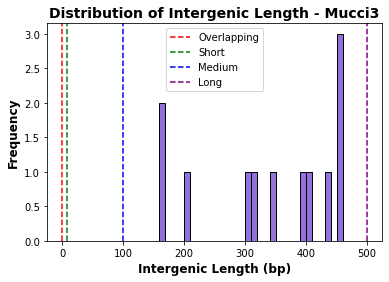

In [75]:
# Definir 14 colores diferentes
colores = ['#9370DB', 'green', 'yellow', 'blue', 'orange', 'cyan', 'magenta', 
           'red', 'brown', 'pink', 'gray', 'olive', 'navy', 'teal']

# Obtener la lista de archivos que terminan en promoters.csv
archivos_promotores = glob("*promoters.csv")

# Crear un DataFrame vacío para almacenar todas las longitudes de promotores
total_df = pd.DataFrame()

# Función para clasificar promotores según su longitud
def clasificar_promotor(longitud):
    if longitud > 0 :
        return "Overlapping"
    if longitud == 0 or longitud > 8:
        return 'Core'
    elif 8 <= longitud < 100:
        return 'Medium'
    elif 100 <= longitud <= 500:
        return 'Long'
    else:
        return 'Undefined'  # Por si hay alguna longitud fuera del rango esperado

for i, archivo in enumerate(archivos_promotores):
    # Cargar los datos del archivo
    df_promotores = pd.read_csv(archivo)
    
    # Clasificar los promotores según su longitud
    df_promotores['Category'] = df_promotores['longitud'].apply(clasificar_promotor)
    
    # Extraer el primer campo del nombre del archivo para el título y el nombre del archivo de salida
    nombre_organismo = os.path.basename(archivo).split('_')[0]
    
    # Añadir una columna con el nombre del organismo
    df_promotores['Organism'] = nombre_organismo
    
    # Concatenar los datos al DataFrame total
    total_df = pd.concat([total_df, df_promotores], ignore_index=True)
    
    
    
    # Graficar el histograma de la longitud de los promotores
    
    plt.hist(df_promotores['longitud'], bins=30, edgecolor='black', color=colores[i % len(colores)])
    plt.xlabel('Intergenic Length (bp)', fontsize=12, fontweight='bold')
    plt.ylabel('Frequency', fontsize=12, fontweight='bold')
    plt.title(f'Distribution of Intergenic Length - {nombre_organismo}', fontsize=14, fontweight='bold')
    
  # Añadir líneas verticales para las categorías
    plt.axvline(x=0, color='r', linestyle='--', label='Overlapping')
    plt.axvline(x=8, color='g', linestyle='--', label='Short')
    plt.axvline(x=100, color='b', linestyle='--', label='Medium')
    plt.axvline(x=500, color='purple', linestyle='--', label='Long')
    
    
    # Añadir leyenda
    plt.legend()
    
    # Guardar el gráfico como archivo SVG
    nombre_salida = f"{nombre_organismo}_promoter_length_distribution.svg"
    plt.savefig(nombre_salida, format='svg')
    
    # Mostrar el gráfico (opcional, puedes comentar esta línea si no necesitas mostrar los gráficos)
    plt.show()
    
    # Cerrar la figura para evitar superposiciones en la próxima iteración
    plt.close()


**Distribución de longitudes de las regiones intergénicas de los genes H2H dimórficos (de micelio y de levadura).**

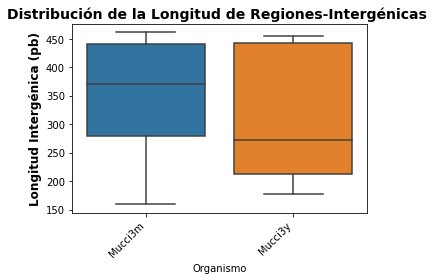

In [13]:
# Obtener la lista de archivos que terminan en promoters.csv
archivos_promotores = glob.glob("*promoters.csv")

# Crear una lista para almacenar los DataFrames de longitud de cada organismo
dfs_longitud = []

for archivo in archivos_promotores:
    # Cargar los datos del archivo
    df_promotores = pd.read_csv(archivo)
    
    # Extraer el primer campo del nombre del archivo para el nombre del organismo
    nombre_organismo = os.path.basename(archivo).split('_')[0]
    
    # Agregar una columna al DataFrame para identificar el organismo
    df_promotores['Organismo'] = nombre_organismo
    
    # Agregar el DataFrame a la lista de DataFrames
    dfs_longitud.append(df_promotores)

# Concatenar todos los DataFrames en uno solo
df_total = pd.concat(dfs_longitud)
#Extraer las columnas Organismo y longitud 
df_distribucion_longitudes = df_total[["Organismo", "longitud"]]
df_distribucion_longitudes.to_csv("df_distribucion_longitudes.csv")
# Ordenar los DataFrames por el nombre del organismo
df_total = df_total.sort_values(by='Organismo')


# Crear el violin plot
plt.figure(figsize=(5, 4))
sns.boxplot(x='Organismo', y='longitud', data=df_total)
#plt.xlabel('Organism', fontsize=12, fontweight='bold')
plt.ylabel('Longitud Intergénica (pb)', fontsize=12, fontweight='bold')
plt.title('Distribución de la Longitud de Regiones-Intergénicas ', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Guardar el gráfico como archivo SVG
nombre_salida = "distribucion_longitud_promotores_por_organismo.svg"
plt.savefig(nombre_salida, format='svg', bbox_inches='tight')

# Mostrar el gráfico
plt.show()

**Contenido GC de las regiones intergénicas de los genes H2H dimórficos (de micelio y de levadura).**

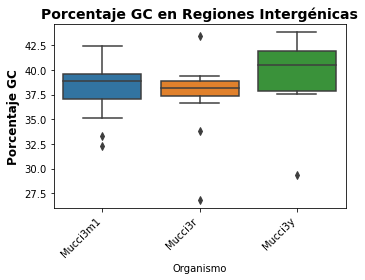

In [4]:
def calcular_porcentaje_gc(secuencia):
    """Calcula el porcentaje de GC en una secuencia dada."""
    gc_conteo = secuencia.count('G') + secuencia.count('C')
    longitud = len(secuencia)
    return (gc_conteo / longitud) * 100 if longitud > 0 else 0

# Obtener la lista de archivos que terminan en _promoters_seq.txt
archivos_promotores = glob.glob("*_promoters_seq.txt")

# Crear listas para almacenar los DataFrames de GC y CpG por organismo
datos_gc = []


for archivo in archivos_promotores:
    # Extraer el primer campo del nombre del archivo para el nombre del organismo
    nombre_organismo = os.path.basename(archivo).split('_')[0]
    
    # Leer las secuencias del archivo
    for record in SeqIO.parse(archivo, "fasta"):
        secuencia = str(record.seq)
        
        # Calcular porcentaje de GC y densidad de CpG
        gc_content = calcular_porcentaje_gc(secuencia)
       
        
        # Agregar los datos a las listas
        datos_gc.append({'Organismo': nombre_organismo, 'GC_Content': gc_content})
       

# Convertir las listas en DataFrames
df_gc_total = pd.DataFrame(datos_gc)
df_gc_total.to_csv("df_gc_total.csv", sep=";")
# Ordenar los DataFrames por el nombre del organismo
df_gc_total = df_gc_total.sort_values(by='Organismo')

# Crear el boxplot para porcentaje de GC
plt.figure(figsize=(5, 4))
sns.boxplot(x='Organismo', y='GC_Content', data=df_gc_total)
#plt.xlabel('Organism', fontsize=12,  fontweight='bold')
plt.ylabel('Porcentaje GC', fontsize=12,  fontweight='bold')
plt.title('Porcentaje GC en Regiones Intergénicas', fontsize=14,  fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Guardar el gráfico como archivo SVG
nombre_salida_gc = "distribucion_porcentaje_gc_por_organismo.svg"
plt.savefig(nombre_salida_gc, format='svg')

# Mostrar el gráfico
plt.show()

